In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [17]:
def preprocess_dataset2(dataset):
    imputer = SimpleImputer(strategy='most_frequent')
    dataset = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)
    categorical_columns = ['State', 'Direction']
    encoder = LabelEncoder()
    for col in categorical_columns:
        dataset[col] = encoder.fit_transform(dataset[col].astype(str))
    numerical_columns = ['Two Wheelers', 'Three Wheelers', 'Four Wheelers', 'Power Station']
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(dataset[numerical_columns])
    return scaled_data

In [18]:
def find_optimal_clusters(data, max_k=6, max_iter=100):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=max_iter)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return distortions

In [19]:
def plot_elbow(distortions, max_k, dataset_name):
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.title(f'Elbow Method for {dataset_name}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

In [20]:
file2_path = 'ev_vehicle.csv'
dataset2 = pd.read_csv(file2_path)

In [21]:
processed_data2 = preprocess_dataset2(dataset2)
distortions2 = find_optimal_clusters(processed_data2, max_k=6)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

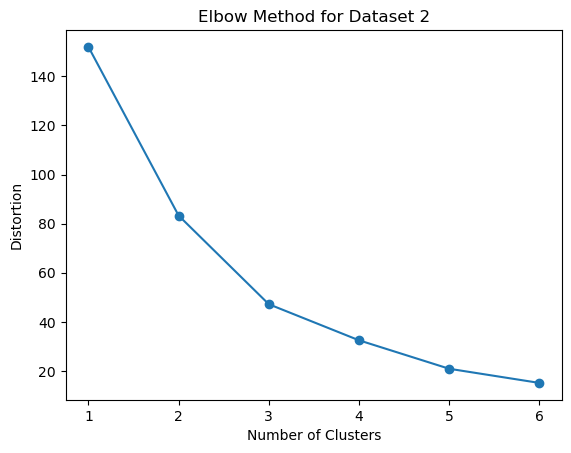

In [22]:
plot_elbow(distortions2, 6, "Dataset 2")

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_data_with_missing_values(dataset, categorical_columns):
    # Handle missing values
    imputer = SimpleImputer(strategy='most_frequent')  # Use 'mean' for numerical-only data
    dataset = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)
    
    # Encode categorical columns
    encoder = LabelEncoder()
    for col in categorical_columns:
        dataset[col] = encoder.fit_transform(dataset[col].astype(str))
    
    # Scale the entire dataset
    scaler = StandardScaler()
    numerical_data = scaler.fit_transform(dataset)
    return numerical_data

categorical_columns = ['State', 'Direction']
preprocess_data_with_categoricals(dataset2, categorical_columns)

array([[-0.50155683, -0.503545  , -0.56275062, -0.60171805, -0.34348626,
        -0.54417573],
       [-1.50467048, -0.503545  , -0.67150707, -0.65368584, -0.34348626,
        -0.59523533],
       [-0.68394113, -0.503545  , -0.63300378, -0.5847983 , -0.34348626,
        -0.510136  ],
       [ 1.23109403, -0.503545  , -0.66883201, -0.64442027, -0.34348626,
        -0.49311614],
       [-0.13678823, -0.503545  , -0.67067385, -0.65408869, -0.34348626,
        -0.32291747],
       [ 0.77513328, -0.503545  , -0.30423479, -0.54894455, -0.33591237,
        -0.44205654],
       [-0.77513328, -0.503545  , -0.11654221, -0.5682814 ,  0.34321333,
         0.3068176 ],
       [-1.23109403, -0.503545  , -0.6442741 , -0.62347201, -0.34348626,
        -0.52715587],
       [-1.04870973, -0.503545  ,  0.65821593,  3.12384921,  5.3091622 ,
         4.85112198],
       [ 1.50467048, -0.503545  , -0.48346366,  0.46946311, -0.29046901,
        -0.52715587],
       [ 0.86632543,  1.5466025 ,  1.18875445,  0.